In [1]:
####################################################
#Using OpenAI Gym ToolKit for developing RL models #
####################################################

In [1]:
#For practice: create an environment that already exists - CartPole-v1

import gym
env = gym.make('CartPole-v1')
env.observation_space #state space
env.action_space

Discrete(2)

In [4]:
#The observation space is Box(4,) which is a 4-dimensional space
# corresponding to 4 real-valued numbers:
# 1) position of the car
# 2) the cart's velocity
# 3) the angle of the pole
# 4) the velocity of the tip of the pole

#The action space, Discrete(2), has two choices: move cart left or right

#We can call .reset on the environment object, env, to reset to the pole's starting state (S0)

env.reset()

#The values correspond to:
#1) initital cart position; 2) velocity; 3) angle; 4) velocity of the pole
# These values are initialized with random values with uniform distribution in the range [-0.05, 0.05]

array([ 0.02912322,  0.0282733 , -0.00207801,  0.02744229])

In [6]:
#Can interact with the environment after reset by using the step() method

env.reset()
env.step(action = 0)
env.step(action = 1)

#The 1st action is to move to the left (action = 0) and the move to the right (action = 1)

#The output is:
# 1) an array for the new state (observations)
# 2) A reward (scalar of type float)
# 3) A termination flag (True or False)
# 4) Dictionary with auxiliary information

#The episode terminates (True) if the angle of the pole is larger than 12 degrees (+/-) 
# or the position of the car is more than 2.4 units from the center

#The reward is to maximize the time the cart and pole are stabilized within the valid
# regions - i.e the length of the episode

(array([-0.00761639,  0.00997466, -0.02257509,  0.00683202]), 1.0, False, {})

In [ ]:
########################
# A Grid World Example #
########################

In [ ]:
# New environment, Grid World, a 4 (rows) x 6 (column) environment

#For these examples - better to use a script rather than executing the code so switching to a script

In [ ]:
############################################
# Implimenting a deep Q-Learning algorithm #
############################################

In [2]:
# Using the CartPole environment - implimenting deep Q-learning using hidden layers

import gym
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from collections import namedtuple
from collections import deque

np.random.seed(1)
tf.random.set_seed(1)

Transition = namedtuple(
    'Transition', ('state', 'action', 'reward',
                  'next_state', 'done'))

class DQNAgent:
    def __init__(
            self, env, discount_factor = 0.95,
            epsilon_greedy = 1.0, epsilon_min = 0.01, 
            epsilon_decay = 0.995, learning_rate = 1e-3,
            max_memory_size = 2000):
        self.enf = env
        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.n
    
        self.memory = deque(maxlen = max_memory_size)
    
        self.gamma = discount_factor
        self.epsilon = epsilon_greedy
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.lr = learning_rate
        self._build_nn_model()
    
    def _build_nn_model(self, n_layers = 3):
        self.model = tf.keras.Sequential()

        ##Hidden Layers
        
        for n in range(n_layers - 1):
            self.model.add(tf.keras.layers.Dense(
            units = 32, activation = 'relu'))

            self.model.add(tf.keras.layers.Dense(
            units = 32, activation = 'relu'))
            
        ## Last Layer
        
        self.model.add(tf.keras.layers.Dense(
            units = self.action_size))
        
        #Build & compile model
        self.model.build(input_shape = (None, self.state_size))
        self.model.compile(
            loss = 'mse',
            optimizer = tf.keras.optimizers.Adam(lr = self.lr))
        
    def remember(self, transition):
        self.memory.append(transition)
        
    def choose_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        
        q_values = self.model.predict(state)[0]
        
        return np.argmax(q_values) # returns action
    
    def _learn(self, batch_samples):
        batch_states, batch_targets = [], []
        for transition in batch_samples:
            s, a, r, next_s, done = transition
            if done:
                target = r
            else:
                target = (r + 
                         self.gamma * np.argmax(
                             self.model.predict(next_s)[0]))
            target_all = self.model.predict(s)[0]
            target_all[a] = target
            batch_states.append(s.flatten())
            batch_targets.append(target_all)
            self._adjust_epsilon()
        return self.model.fit(x = np.array(batch_states),
                             y = np.array(batch_targets),
                             epochs = 1,
                             verbose = 0)
    
    def _adjust_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
            
    def replay(self, batch_size):
        samples = random.sample(self.memory, batch_size)
        history = self._learn(samples)
        return history.history['loss'][0]

Episodes: 0/200, Total rewards: 29
Episodes: 1/200, Total rewards: 10
Episodes: 2/200, Total rewards: 7
Episodes: 3/200, Total rewards: 9
Episodes: 4/200, Total rewards: 8
Episodes: 5/200, Total rewards: 9
Episodes: 6/200, Total rewards: 18
Episodes: 7/200, Total rewards: 9
Episodes: 8/200, Total rewards: 27
Episodes: 9/200, Total rewards: 8
Episodes: 10/200, Total rewards: 10
Episodes: 11/200, Total rewards: 8
Episodes: 12/200, Total rewards: 10
Episodes: 13/200, Total rewards: 7
Episodes: 14/200, Total rewards: 8
Episodes: 15/200, Total rewards: 9
Episodes: 16/200, Total rewards: 8
Episodes: 17/200, Total rewards: 23
Episodes: 18/200, Total rewards: 10
Episodes: 19/200, Total rewards: 9
Episodes: 20/200, Total rewards: 9
Episodes: 21/200, Total rewards: 10
Episodes: 22/200, Total rewards: 22
Episodes: 23/200, Total rewards: 9
Episodes: 24/200, Total rewards: 9
Episodes: 25/200, Total rewards: 7
Episodes: 26/200, Total rewards: 9
Episodes: 27/200, Total rewards: 8
Episodes: 28/200, To

TypeError: object of type 'int' has no len()

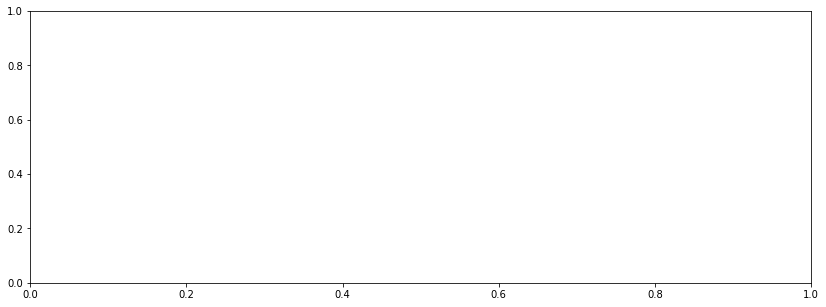

In [3]:
def plot_learning_history(history):
    fig = plt.figure(1, figsize = (14, 5))
    ax = fig.add_subplot(1, 1, 1)
    episodes = np.arange(len(history[0])) + 1
    plt.plot(episodes, history[0], lw = 4,
            marker = 'o', markersize = 10)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
    plt.xlabel('Episodes', size = 20)
    plt.ylabel('# Total Rewards', size = 20)
    plt.show()

## General Settings

EPISODES = 200
batch_size = 32
init_replay_memory_size = 500

if __name__ == '__main__':
    env = gym.make('CartPole-v1')
    agent = DQNAgent(env)
    state = env.reset()
    state = np.reshape(state, [1, agent.state_size])
    
    ## Filling up the replay-memory
    for i in range(init_replay_memory_size):
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, agent.state_size])
        agent.remember(Transition(state, action, reward, 
                                  next_state, done))
        if done:
            state = env.reset()
            state = np.reshape(state, [1, agent.state_size])
        else:
            state = next_state
            
    total_rewards, losses = [], []
    
    for e in range(EPISODES):
        state = env.reset()
        if e % 10 == 0:
            env.render()
        state = np.reshape(state, [1, agent.state_size])
        for i in range(500):
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state,
                                   [1, agent.state_size])
            agent.remember(Transition(state, action, reward,
                                     next_state, done))
            state = next_state
            if e % 10 == 0:
                env.render()

            if done:
                total_rewards.append(i)
                print('Episodes: %d/%d, Total rewards: %d'
                     % (e, EPISODES, i))
                
                break
            
            loss = agent.replay(batch_size)
            losses.append(loss)
    plot_learning_history(total_rewards)
        
